 ## 상품명 : 미래에셋대우 공모 ELS 26005회 조기상환형 조건충족시 연 5%(세전) / 최대손실률 -100%
## 상품정보 : https://www.miraeassetdaewoo.com/ 접속 후 상품정보>ELS 검색에서 날짜 2018/06/08에 26005
## 기초지수 : HSECI - EUROSTOXX50

In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from scipy.sparse import diags
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

 # Operator Splitting FDM
 
 ## ● Implicit scheme in x variable only in first leg
 ## ● Implicit scheme in y variable only in second leg 
 ## ● Correlation and no derivative terms are averaged

\begin{align}
\ \frac{u_{n,l}^{m+1} - u_{n,l}^{m}}{\Delta t} = \frac{u_{n,l}^{m^\star} - u_{n,l}^{m}}{\Delta t} + \frac{u_{n,l}^{m+1} - u_{n,l}^{m^\star}}{\Delta t} =L_{OS}^{x} u_{n,l}^{m^\star} + L_{OS}^{y} u_{n,l}^{m+1}  \\
\ ( m^\star = m + \frac{1}{2}\delta \tau \ )
\\
\end{align}
 ## First Lag
\begin{align}
\\
\ L_{OS}^{x} u_{n,l}^{m^\star} \\\\= b_n u_{n-1, l}^{m^\star} + a_n u_{n, l}^{m^\star}\ + c_n u_{n+1, l}^{m^\star} = d_m \ 
\\
\\
\ a_n = 1+ \Delta t \times(\frac{1}{2}+ (r-d)n + (\sigma_y n)^2 ) \
\\
\ b_n = - \frac{ (\sigma_y n )^2 \Delta t}{2}
\\
\ c_n = - \frac{ (\sigma_y n )^2 \Delta t }{2} - rn \Delta t \
\\
\ d_{n,l}^m = u_{n,l}^m + \frac{\rho \sigma_y \sigma_x nl \Delta t }{8} (u_{n+1,l+1}^m + u_{n-1,l-1}^m - u_{n-1,l+1}^m - u_{n+1,l-1}^m )\
\end{align}

 ## Second Lag
\begin{align}
\\
\ L_{OS}^{y} u_{n,l}^{m+1} \\\\= b_l u_{n-1, l}^{m+1} + a_l u_{n, l}^{m+1}\ + c_l u_{n+1, l}^{m+1} = d_{m^\star} \ 
\\
\\
\ a_l = 1+ \Delta t\times(\frac{1}{2}+ (r-d)\bullet l + (\sigma_x \bullet l)^2 ) \
\\
\ b_l = - \frac{ (\sigma_x \bullet l )^2 \Delta t}{2}
\\
\ c_l = - \frac{ (\sigma_x \bullet l )^2 \Delta t}{2} - rl\Delta t \
\\
\ d_{n,l}^{m^\star} = u_{n,l}^{m^\star} + \frac{\rho \sigma_y \sigma_x nl\Delta t }{8} (u_{n+1,l+1}^{m^\star} + u_{n-1,l-1}^{m^\star} - u_{n-1,l+1}^{m^\star} - u_{n+1,l-1}^{m^\star} )\
\end{align}

 ## Boundary Condition ( First Lag)
\begin{align}
\ V_{-1, l} = 2V_{0, l} - V_{1,l}\\ V_{n, -1} = 2V_{n, 0} - V_{n,1}  \\ \ V_{(N+1 , l)}= 2V_{(N ,l)}-V_{(N-1,l)} \\ V_{(n , L+1)}= 2V_{(n ,L)}-V_{(n,L-1)}\\ \\
\ d_{(0, l)}^{m} >> u_{0,l}^{m} \\
\ d_{(n, 0)}^{m} >> u_{n,0}^{m} \
\\
 d_{(N, l)}^{m} >> u_{N,l}^{m} + \frac{\rho \sigma_y \sigma_x Nl\Delta t }{8} (2u_{N,l+1}^{m} + 2u_{N-1,l-1}^{m} - 2u_{N-1,l+1}^{m} - 2u_{N,l-1}^{m} )
\\
 d_{(n, L)}^{m} >> u_{n,L}^{m} + \frac{\rho \sigma_y \sigma_x nL\Delta t }{8} (2u_{n+1,L}^{m} + 2u_{n-1,L-1}^{m} - 2u_{n+1,L-1}^{m} - 2u_{n-1,L}^{m} )
\end{align}

 ## Matrix ( First Lag)
$$\begin{bmatrix} b_0 + 2a_0 & c_0-a_0 & 0 & 0& ... & 0& 0 & 0\\ a_1 & b_1 & c_1& 0& ...& 0 & 0& 0 \\ 0 & a_2 & b_2& c_2& ...& 0 & 0& 0\\ 0 & 0 & a_3& b_3& ...& 0& 0& 0\\ ... & ... & ...& ...& ...& 0& 0& 0\\ 0 & 0 & 0& 0& ...& a_{N-1} & b_{N-1}& c_{N-1}\\ 0 & 0 & 0& 0& 0& 0& a_{N}-c_{N}& b_{N}+2c_{N} \end{bmatrix} u_{n,l}^{m^\star} = 
\begin{bmatrix} d_{0,0}^{m} & d_{0,1}^{m} & .. & ...& ... & ...& ... & d_{0,L}^{m}\\ d_{1,0}^{m} & d_{1,1}^{m} &...& ...& ...& ... & ...& ... \\ ... & ... & ...& ...& ...& ... & ...& ...\\   &   &  & & ...& &  &  \\ ... & ... & ...& ...& ...&  &  &  \\   &   &  &  & ...&   & d_{N-1,L-1}^{m}& d_{N-1,L}^{m}\\   &   &  &  &  &  &  & d_{N,L}^{m} \end{bmatrix}$$ 

\begin{align}
\\
{u_{n,l}^{m^{\star}}} = (triagonal_1)^{-1}  d_{n,l}^{m}\ 
\end{align}
 ## Repeat This Logic on Second Lag
\begin{align}
\\
{u_{n,l}^{m+1} = (triagonal_2)^{-1} \times d_{n,l}^{m^\star}\ }
\\
{(m = 0 >> Maturity  , m = T >> Current)}
\end{align}

In [2]:
#############################setting########################
name        = 'EuroStoxx50','HSCEI'
X,Y         =  3446 , 12166
r           =  np.array([0.02 , 0.02155, 0.0228, 0.0238, 0.0243, 0.0247 ]) # Interest Rate Term Structure [T = 0.5 to 3]
Divx, Divy  =  0.035, 0.025
T           =  3
std_x_K     =  np.array([0.182, 0.171, 0.169, 0.175, 0.174, 0.178])   # Implied Vol where exercised by K = [K1, K2, K3, K4, K5, K6]
std_x_KI    =  np.array([                                   0.248])   # Implied Vol where exercised by Knuck In Ratio
std_y_K     =  np.array([0.209, 0.215, 0.221, 0.232, 0.230, 0.232])   
std_y_KI    =  np.array([                                   0.279])
cr          =  np.array([0.025, 0.05,  0.075, 0.1,   0.125, 0.15 ]).astype(np.float32)
K           =  np.array([0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ]).astype(np.float32)
KI          =  0.5
rho         =  0.316

In [3]:
def F_rate(r, T, Coupon_Freq = 0.5) :
    t = np.arange(Coupon_Freq, T+Coupon_Freq, Coupon_Freq)
    Frate = np.concatenate([r[0:1],((r*t)[1:] - (r*t)[:-1])/Coupon_Freq])
    return Frate

In [4]:
N = 300

In [5]:
def Calculate_F_Vol(std_x_K, std_x_KI, T, Coupon_Freq = 0.5) :
    t = np.arange(Coupon_Freq, T+Coupon_Freq, Coupon_Freq)    
    ### Calculate Forward Vol ###
    F_Vol_x_KI = np.concatenate([std_x_K[0:1],
                                np.sqrt( np.maximum(((std_x_K**2 * t)[1:] - (std_x_K**2 * t)[:-1])/Coupon_Freq ,0.01) )])
    F_Vol_x_NKI = np.concatenate([std_x_K[0:1],
                                 np.sqrt(np.maximum(((np.r_[std_x_K[:-1], std_x_KI[-1]]**2 * t)[1:] -
                                                     (np.r_[std_x_K[:-1], std_x_KI[-1]]**2 * t)[:-1])/Coupon_Freq, 0.01))])
    return F_Vol_x_KI, F_Vol_x_NKI

In [6]:
def ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C = 125,
               N = 250, F = 100, max_multiple = 3, Current_Price = False) :    
    #############################
    ### Calculate Forward Vol ###
    #############################
    F_Vol_x_KI,  F_Vol_x_NKI  =  Calculate_F_Vol(std_x_K, std_x_KI, T)
    F_Vol_y_KI,  F_Vol_y_NKI  =  Calculate_F_Vol(std_y_K, std_y_KI, T)
    Frate = F_rate(r, T)
    ### initial Vol == Final Forward Vol ###
    sigx,   sigy  =  F_Vol_x_KI[-1].astype(np.float32),  F_Vol_y_KI[-1].astype(np.float32)
    sigx2,  sigy2 =  F_Vol_x_NKI[-1].astype(np.float32) ,  F_Vol_y_NKI[-1].astype(np.float32)
    r = Frate[-1].astype(np.float32)
    
    pp  =  day_C_to_C   # 6 M = 125days
    M   =  len(cr) * pp
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    Xrange, Yrange = np.arange(0,Xmax+1, dx),  np.arange(0,Ymax+1,dy)
    KI_conditionX , KI_conditionY = (Xrange<X * KI).sum()   ,  (Yrange<Y * KI).sum()
    K0_conditionX , K0_conditionY = (Xrange<X * K[-1]).sum(),  (Yrange<Y * K[-1]).sum()
        
    inv     = np.linalg.inv
    CR      = cr[::-1]
    dt , h  = T/M ,T/M
    nx , ny = np.arange(0,N+1).astype(np.float32) , np.arange(0,N+1).astype(np.float32)
    ###########################################################
    ############## Tridiag Parameter (Knock In) ###############
    ###########################################################
    an = (     1 + h*(0.5*r + (r-Divy)*ny + (sigy*ny)**2)         )
    bn = (     -(sigy*ny)**2*0.5*h                                )
    cn = (     -(sigy*ny)**2*0.5*h - (r-Divy)*ny*h                )
    al = (     1 + h*(0.5*r + (r-Divx)*nx + (sigx*nx)**2)         )
    bl = (     -(sigx*nx)**2*0.5*h                                )
    cl = (     -(sigx*nx)**2*0.5*h - (r-Divx)*nx*h                )

    AAA = rho * sigy * sigx * h / 8
    ################################################
    ############# Boundary Condition ###############
    ################################################
    an[0]  = an[0]  + 2*bn[0]
    an[-1] = an[-1] + 2*cn[-1]
    cn[0]  = cn[0]  - bn[0]
    bn[-1] = bn[-1] - cn[-1]

    al[0]  = al[0]  + 2*bl[0]
    al[-1] = al[-1] + 2*cl[-1]
    cl[0]  = cl[0]  - bl[0]
    bl[-1] = bl[-1] - cl[-1]
    ###############################################
    #############Inverse Tridiagonal ##############
    ###############################################
    k   ,  k2   = np.array([bn[1:], an, cn[:-1]]) , np.array([bl[1:], al, cl[:-1]])
    offset      = [-1,0,1]
    diag        = diags(k,offset).toarray()
    diag2       = diags(k2,offset).toarray()
    A,B = inv(diag) , inv(diag2)
    A,B = A.astype(np.float32), B.astype(np.float32)

    Data = np.zeros((M,N+1,N+1), dtype=np.float32) # t,y,x
    Data_hat = Data.copy()
 
    nl = ny.reshape(len(ny),1).dot(nx.reshape(1,len(nx))).astype(np.int32)
    nl2 = nx.reshape(len(nx),1).dot(ny.reshape(1,len(ny))).astype(np.int32)
    ###############################################
    ############ Knock In Data ####################
    ###############################################    
    Data[0] = np.minimum(   (F *Yrange/Y).reshape(-1,1)  , F*Xrange/X  )
    Data[0][K0_conditionY:, K0_conditionX:] =  F * (1+CR[0])
    D = np.zeros(Data[0].shape)
    for t in range(M-1) :
        d = Data[t][1:-1,1:-1] + AAA * nl[1:-1,1:-1] * (Data[t][2:,2:]+Data[t][:-2,:-2]-                                                    
                                                        Data[t][:-2,2:]-Data[t][2:,:-2])
        D[1:-1, 1:-1] = d        
        D[-1, 1:-1] = Data[t, -1, 1:-1] + AAA * nl[-1,1:-1] * (2 * (Data[t, -1, 2:]  +
                                                                    Data[t, -2, :-2] -
                                                                    Data[t, -2, 2:]  -
                                                                    Data[t, -1, :-2]))
        D[1:-1, -1] = Data[t, 1:-1, -1] + AAA * nl[1:-1,-1] * (2 * (Data[t, 2:, -1]  +
                                                                    Data[t, :-2, -2] -
                                                                    Data[t, 2:, -2]  -
                                                                    Data[t, :-2, -1]))
        D[-1,-1] = D[-1,-2] * 0.5 + D[-2,-1]*0.5
        Data_hat[t] = A.dot(D)
        Data_hat_T = Data_hat[t].T

        d = Data_hat_T[1:-1,1:-1] + AAA * nl[1:-1,1:-1] * (Data_hat_T[2:,2:]  +                                                       
                                                           Data_hat_T[:-2,:-2]-                                                    
                                                           Data_hat_T[:-2,2:] -
                                                           Data_hat_T[2:,:-2])
        D[1:-1, 1:-1] = d    
        D[-1, 1:-1] = Data_hat_T[-1, 1:-1]+AAA*nl[-1,1:-1]*2*(Data_hat_T[ -1, 2:] +                                                          
                                                              Data_hat_T[ -2, :-2]-
                                                              Data_hat_T[ -2, 2:] -
                                                              Data_hat_T[ -1, :-2])
        D[1:-1, -1] = Data_hat_T[ 1:-1, -1]+AAA*nl[1:-1,-1]*2*(Data_hat_T[ 2:, -1]+                                                           
                                                               Data_hat_T[ :-2, -2]-
                                                               Data_hat_T[ 2:, -2] -
                                                               Data_hat_T[ :-2, -1])
        D[-1,-1] = D[-1,-2] * 0.5 + D[-2,-1]*0.5
        temp = B.dot(D)
        Data[t+1] = temp.T

        if (t+2)%pp == 0 and t<=(len(CR)-1)*pp : # Coupon Date                
            Kx,Ky = X *K[-(int((t+2)/pp))-1] , Y * K[-(int((t+2)/pp))-1]
            conditionY = (Yrange<Ky).sum() # 행사가격 아래의 Y축 갯수
            conditionX = (Xrange<Kx).sum() # 행사가격 아래의 X축 갯수
            Data[t+1][conditionY:,conditionX:] = F * (1+CR[int((t+2)/pp)])
            ###########################################################
            ############## Change Forward Vol and Parameters###########
            ###########################################################            
            sigx , sigy = F_Vol_x_KI[-(int((t+2)/pp))-1] , F_Vol_y_KI[-(int((t+2)/pp))-1]
            r = Frate[-(int((t+2)/pp))-1]
            ############## Tridiag Parameter (Knock In) ###############
            an  = (    1+ h * (0.5*(r) + (r-Divy)*ny + (sigy*ny)**2)     )
            bn  = (    -(sigy*ny)**2*0.5*h                               )
            cn  = (    -(sigy*ny)**2*0.5*h - (r-Divy)*ny*h               )
            al  = (    1+ h * (0.5*(r) + (r-Divx)*nx + (sigx*nx)**2)     )
            bl  = (    -(sigx*nx)**2*0.5*h                               )
            cl  = (    -(sigx*nx)**2*0.5*h - (r-Divx)*nx*h               )    
            AAA = rho * sigy * sigx * h / 8
            ############# Boundary Condition ###############
            an[0]  =  an[0]  + 2*bn[0]
            an[-1] =  an[-1] + 2*cn[-1]
            cn[0]  =  cn[0]  - bn[0]
            bn[-1] =  bn[-1] - cn[-1]
            al[0]  =  al[0]  + 2*bl[0]
            al[-1] =  al[-1] + 2*cl[-1]
            cl[0]  =  cl[0]  - bl[0]
            bl[-1] =  bl[-1] - cl[-1]
            #############Inverse Tridiagonal ##############
            k ,k2  = np.array([bn[1:], an, cn[:-1]])  , np.array([bl[1:], al, cl[:-1]])
            offset = [-1,0,1]
            diag   = diags(k,offset).toarray()
            diag2  = diags(k2,offset).toarray()
            A ,B   = inv(diag), inv(diag2)             
    KI_Data = Data.copy()
    r = Frate[-1].astype(np.float32)
    ###############################################################
    ############## Tridiag Parameter (Not Knock In) ###############
    ###############################################################    
    an = (        1+ h * (0.5*(r) + (r-Divy)*ny + (sigy2*ny)**2)            )
    bn = (        -(sigy2*ny)**2*0.5*h                                      )
    cn = (        -(sigy2*ny)**2*0.5*h - (r-Divy)*ny*h                      )
    al = (        1+ h * (0.5*(r) + (r-Divx)*nx + (sigx2*nx)**2)            )
    bl = (        -(sigx2*nx)**2*0.5*h                                      )
    cl = (        -(sigx2*nx)**2*0.5*h - (r-Divx)*nx*h                      )    
    AAA = rho * sigy2 * sigx2 * h / 8
    ############# Boundary Condition ###############
    an[0]  =  an[0] + 2*bn[0]
    an[-1] = an[-1] + 2*cn[-1]
    cn[0]  =  cn[0] - bn[0]
    bn[-1] = bn[-1] - cn[-1]        
    al[0]  = al[0]  + 2*bl[0]
    al[-1] = al[-1] + 2*cl[-1]
    cl[0]  = cl[0]  - bl[0]
    bl[-1] = bl[-1] - cl[-1]    
    #############Inverse Tridiagonal ##############
    k, k2  = np.array([bn[1:], an, cn[:-1]])  , np.array([bl[1:], al, cl[:-1]])
    offset = [-1,0,1]
    diag   = diags(k,offset).toarray()
    diag2  = diags(k2,offset).toarray()
    A, B   = inv(diag), inv(diag2)
    ############Not Knock In Data  ###############        
    D = np.zeros(Data[0].shape)
    Data[0] = np.minimum((F *Yrange/Y).reshape(-1,1) , F*Xrange/X)
    Data[0][KI_conditionY:, KI_conditionX:] =  F * (1+CR[0])
    for t in range(M-1) :
        d =Data[t][1:-1,1:-1]+AAA * nl[1:-1,1:-1] * (Data[t][2:,2:]+Data[t][:-2,:-2]-                                                     
                                                     Data[t][:-2,2:]-Data[t][2:,:-2])
        D[1:-1, 1:-1] = d      
        D[  -1, 1:-1] = Data[t,-1,1:-1]+ AAA*nl[-1,1:-1]*(2 *(Data[t, -1, 2:] +                                                               
                                                              Data[t, -2, :-2] -
                                                              Data[t, -2, 2:] -
                                                              Data[t, -1, :-2]))
        D[1:-1,   -1] = Data[t,1:-1,-1]+ AAA*nl[1:-1,-1]*(2 *(Data[t, 2:, -1] +
                                                              Data[t, :-2, -2] -                                                               
                                                              Data[t, 2:, -2] -
                                                              Data[t, :-2, -1]))
        D[-1,-1]      = D[-1,-2] * 0.5 + D[-2,-1]*0.5
        Data_hat[t]   = A.dot(D)
        Data_hat_T    = Data_hat[t].T
            
        d =Data_hat_T[1:-1,1:-1]+AAA * nl[1:-1,1:-1] * (Data_hat_T[2:,2:]+                                                        
                                                        Data_hat_T[:-2,:-2]-                                                    
                                                        Data_hat_T[:-2,2:]-
                                                        Data_hat_T[2:,:-2])
        D[1:-1,1:-1] = d    
        D[  -1,1:-1] = Data_hat_T[-1,1:-1]+AAA*nl[-1,1:-1]*2*(Data_hat_T[ -1, 2:]+                                                          
                                                              Data_hat_T[ -2, :-2] -
                                                              Data_hat_T[ -2, 2:] -
                                                              Data_hat_T[ -1, :-2])
        D[1:-1, -1] = Data_hat_T[ 1:-1, -1]+AAA*nl[1:-1,-1]*2*(Data_hat_T[ 2:, -1] +                                                           
                                                               Data_hat_T[ :-2, -2] -
                                                               Data_hat_T[ 2:, -2] -
                                                               Data_hat_T[ :-2, -1])
        D[-1,-1] = D[-1,-2] * 0.5 + D[-2,-1]*0.5
        temp     = B.dot(D)
        Data[t+1]= temp.T            

        if (t+2)%pp == 0 and t<=(len(CR)-1)*pp : # Coupon Date
            Kx,Ky = X *K[-(int((t+2)/pp))-1] , Y * K[-(int((t+2)/pp))-1]
            conditionY = (Yrange<Ky).sum() # 행사가격 아래의 Y축 갯수
            conditionX = (Xrange<Kx).sum() # 행사가격 아래의 X축 갯수
            Data[t+1][conditionY:,conditionX:] = F * (1+CR[int((t+2)/pp)])

            ############## Change Forward Vol and Parameters###########
            sigx , sigy = F_Vol_x_NKI[-(int((t+2)/pp))-1] , F_Vol_y_NKI[-(int((t+2)/pp))-1]
            r = Frate[-(int((t+2)/pp))-1]
            ############## Tridiag Parameter (Knock In) ###############
            an = (     1+ h * (0.5*(r) + (r-Divy)*ny + (sigy*ny)**2)   )
            bn = (     -(sigy*ny)**2*0.5*h                             )
            cn = (     -(sigy*ny)**2*0.5*h - (r-Divy)*ny*h             )
            al = (     1+ h * (0.5*(r) + (r-Divx)*nx + (sigx*nx)**2)   )
            bl = (     -(sigx*nx)**2*0.5*h                             )
            cl = (     -(sigx*nx)**2*0.5*h - (r-Divx)*nx*h             )    
            AAA = rho * sigy * sigx * h / 8
            ############# Boundary Condition ###############
            an[0]  =  an[0] + 2*bn[0]
            an[-1] = an[-1] + 2*cn[-1]
            cn[0]  =  cn[0] - bn[0]
            bn[-1] = bn[-1] - cn[-1]
            al[0]  =  al[0] + 2*bl[0]
            al[-1] = al[-1] + 2*cl[-1]
            cl[0]  =  cl[0] - bl[0]
            bl[-1] = bl[-1] - cl[-1]
            #############Inverse Tridiagonal ##############
            k, k2  = np.array([bn[1:], an, cn[:-1]]) , np.array([bl[1:], al, cl[:-1]])
            offset = [-1,0,1]
            diag   = diags(k,offset).toarray()
            diag2  = diags(k2,offset).toarray()
            A, B   = inv(diag) , inv(diag2)
                
        Data[t+1][:KI_conditionY,:] = KI_Data[t+1][:KI_conditionY,:]
        Data[t+1][:,:KI_conditionX] = KI_Data[t+1][:,:KI_conditionX]
    NKI_Data = Data
    if Current_Price == False :
        return NKI_Data
    else :
        ######## Current Price ##########
        P = NKI_Data[-1, int(Y//dy), int(X//dx)]    
        return  NKI_Data, P

In [7]:
Price, P = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                        
                       r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C = 125,
                       N = N, F = 100, max_multiple = 3, Current_Price = True)

In [8]:
def make_vega_rho(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                  r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C = 125,
                  N = 250, F = 100, max_multiple = 3, Current_Price = False)  :    
    Price = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                        r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C,
                        N , F, max_multiple, Current_Price) 
    New_P_Vx = ELS_Pricing(X,Y, std_x_KI * 1.01, std_x_K*1.01, std_y_KI, std_y_K,
                           r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C,
                           N , F, max_multiple, Current_Price)
    New_P_Vy = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI*1.01, std_y_K*1.01,                           
                           r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C,
                           N , F, max_multiple, Current_Price)
    dsigmax = (0.5 * std_x_KI.mean() * 0.01 + 0.5 * std_x_K.mean() * 0.01)
    dsigmay = (0.5 * std_y_KI.mean() * 0.01 + 0.5 * std_y_K.mean() * 0.01)
    VegaX = (New_P_Vx - Price)/dsigmax
    VegaY = (New_P_Vy - Price)/dsigmay

    New_P_rho = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                           
                            r, T, Divx, Divy, cr, K, KI, rho * 1.02, day_C_to_C,
                            N , F, max_multiple, Current_Price)    
    Rho_Greeks = (New_P_rho - Price)/(rho * 0.02)
    return VegaX, VegaY, Rho_Greeks
    
    
def make_delta_gamma(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                     r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C = 125,
                     N = 250, F = 100, max_multiple = 3, Current_Price = False) :        
    Xmax, Xmin = max_multiple*X,0
    Ymax,Ymin = max_multiple*Y,0
    dx = (Xmax - Xmin)/N
    dy = (Ymax - Ymin)/N      
    Price = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                        r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C,
                        N , F, max_multiple, Current_Price) 
    
    DeltaY = np.zeros(Price.shape)  
    DeltaY[:,:-1,:] = ((Price[:,1:,:] - Price[:,:-1,:]))/F/(dy/Y)
    DeltaY[:,-1,:] = 2*DeltaY[:,-2,:] - DeltaY[:,-3,:]

    DeltaX = np.zeros(Price.shape)
    DeltaX[:,:,:-1] = ((Price[:,:,1:] - Price[:,:,:-1])/F)/(dx/X)
    DeltaX[:,:,-1] = 2*DeltaX[:,:,-2] - DeltaX[:,:,-3]
    
    GammaX = np.zeros(Price.shape)
    GammaX[:,:,:-1] = ((DeltaX[:,:,1:] - DeltaX[:,:,:-1])/F)/(dx/X)
    GammaX[:,:,-1] = 2*GammaX[:,:,-2] - GammaX[:,:,-3] 

    GammaY = np.zeros(Price.shape)
    GammaY[:,:-1,:] = ((DeltaY[:,1:,:] - DeltaY[:,:-1,:])/F)/(dy/Y)
    GammaY[:,-1,:] = 2*GammaY[:,-2,:] - GammaY[:,-3,:]

    GammaXY = np.zeros(Price.shape)
    GammaXY = ((DeltaY[:,:,1:] - DeltaY[:,:,:-1])/F)/(dx/X)
    GammaXY[:,:,-1] = 2*GammaXY[:,:,-2] - GammaXY[:,:,-3]     
    
    return DeltaX ,DeltaY, GammaX, GammaY, GammaXY

In [9]:
VegaX, VegaY, Rho_Greeks  = make_vega_rho(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                                          
                                          r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C = 125,
                                          N = N, F = 100, max_multiple = 3, Current_Price = False)

In [10]:
DeltaX ,DeltaY, GammaX, GammaY, GammaXY = make_delta_gamma(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                                                           
                                                           r, T, Divx, Divy, cr, K, KI, rho, day_C_to_C = 125,
                                                           N = N, F = 100, max_multiple = 3, Current_Price = False)

In [11]:
def MC_price(X,Y,std_x_K, std_x_KI, std_y_K, std_y_KI,KI,cr,K,r,T,rho, F = 100, days_C_to_C = 125,number_of_simul = 10000) :
    Frate = F_rate(r,T)
    F_Vol_x_KI,  F_Vol_x_NKI  =  Calculate_F_Vol(std_x_K, std_x_KI, T)
    F_Vol_y_KI,  F_Vol_y_NKI  =  Calculate_F_Vol(std_y_K, std_y_KI, T)    
    
    F_Vol_x = F_Vol_x_NKI
    F_Vol_y = F_Vol_y_NKI
    F_Vol_x2 = F_Vol_x_KI
    F_Vol_y2 = F_Vol_y_KI
    
    pp = days_C_to_C
    DF = np.exp(-(np.repeat(T/len(cr), len(cr)) * Frate)).cumprod()
    KIx, KIy = KI * X , KI * Y
    M = len(cr) * pp

    r = np.concatenate([[0],np.repeat(Frate , days_C_to_C)]).reshape(-1,1)
    cov = [[1,rho],[rho,1]]
    Time_number = M
    t = T/Time_number
    Time_space = np.linspace(0,T,Time_number+1).astype(np.float32)
    multinorm = np.random.multivariate_normal([0,0], cov, (Time_number , number_of_simul) ).astype(np.float32)
    Time_space = Time_space.reshape(Time_number+1,1)
    e = multinorm.transpose(0,2,1)
    ex , ey = e[:,0,:], e[:,1,:]    
    sigx = np.concatenate([[0],np.repeat(F_Vol_x , days_C_to_C)]).reshape(-1,1)
    sigy = np.concatenate([[0],np.repeat(F_Vol_y , days_C_to_C)]).reshape(-1,1)
    cum_diffusion_x = (sigx * np.sqrt(t) * np.concatenate([np.zeros((1,number_of_simul)) , ex], axis = 0)).cumsum(0)
    cum_drift_x = ((r-Divx - 0.5 * sigx **2 ) * np.concatenate([np.zeros((1,1)),np.ones((M,1))],axis = 0) * t).cumsum(0)
    cum_diffusion_y = (sigy * np.sqrt(t) * np.concatenate([np.zeros((1,number_of_simul)) , ey], axis = 0)).cumsum(0)
    cum_drift_y = ((r-Divy - 0.5 * sigy **2 ) * np.concatenate([np.zeros((1,1)),np.ones((M,1))],axis = 0) * t).cumsum(0)
    price_x = X * np.exp( cum_drift_x + cum_diffusion_x )
    price_y = Y * np.exp( cum_drift_y + cum_diffusion_y )

    sigx2 = np.concatenate([[0],np.repeat(F_Vol_x2 , days_C_to_C)]).reshape(-1,1)
    sigy2 = np.concatenate([[0],np.repeat(F_Vol_y2 , days_C_to_C)]).reshape(-1,1)
    
    
    ##################### Change NKI_Vol_to_KI_Vol after KI Case #####################

    KI_x_matrix = ((price_x < KIx).cumsum(0) > 0 )
    KI_y_matrix = ((price_y < KIy).cumsum(0) > 0 )
    KI_matrix = np.maximum(KI_x_matrix, KI_y_matrix)
    KI_matrix = (KI_matrix.cumsum(0) > 1) > 0  # 1 after Knuck In
    KI_x_result = ((price_x < KIx).sum(0) > 0 ).reshape(1,-1)
    KI_y_result = ((price_y < KIy).sum(0) > 0 ).reshape(1,-1)
    KI_num = np.maximum(KI_x_result, KI_y_result) # either A or B KI >> KI
    
    sigx = sigx * (1-KI_matrix) + sigx2 * KI_matrix
    sigy = sigy * (1-KI_matrix) + sigy2 * KI_matrix
    
    ##################### Change Stock Process with KI Parameter after KI Case #######
    cum_diffusion_x = (sigx * np.sqrt(t) * np.concatenate([np.zeros((1,number_of_simul)) , ex], axis = 0)).cumsum(0)
    cum_drift_x = ((r-Divx - 0.5 * sigx **2 ) * np.concatenate([np.zeros((1,1)),np.ones((M,1))],axis = 0) * t).cumsum(0)
    cum_diffusion_y = (sigy * np.sqrt(t) * np.concatenate([np.zeros((1,number_of_simul)) , ey], axis = 0)).cumsum(0)
    cum_drift_y = ((r-Divy - 0.5 * sigy **2 ) * np.concatenate([np.zeros((1,1)),np.ones((M,1))],axis = 0) * t).cumsum(0)    
    price_x = X * np.exp( cum_drift_x + cum_diffusion_x )
    price_y = Y * np.exp( cum_drift_y + cum_diffusion_y )
    
    #####################

    KI_x_result = ((price_x < KIx).sum(0) > 0 ).reshape(1,-1)
    KI_y_result = ((price_y < KIy).sum(0) > 0 ).reshape(1,-1)
    KI_num = np.maximum(KI_x_result, KI_y_result) # either A or B KI >> KI
    
    Autocall_Value = (F * (1+cr) * DF).reshape(-1,1)
    ## Knuck In Case ##
    KI_casex = (price_x * KI_num)[pp::pp,:]
    KI_casey = (price_y * KI_num)[pp::pp,:]
    ## Knuck In + Autocall ## 
    KI_AC_conx = (KI_casex >= (K * X).reshape(-1,1) )[:-1,:]
    KI_AC_cony = (KI_casey >= (K * Y).reshape(-1,1) )[:-1,:]
    KI_AC = (KI_AC_conx * KI_AC_cony).cumsum(0).cumsum(0) == 1
    KI_AC_num = (KI_AC.sum(0) > 0 ).reshape(1,-1).astype(np.int32)
    KI_AC_value = KI_AC * Autocall_Value[:-1,:]
    ## Knuck In + Not Autocall Maturity Value ##
    KI_Not_AC_condition = KI_num - KI_AC_num
    #KI_payoff_at_maturity
    KI_Not_AC_above_K_condition = np.minimum((price_x[-1,:]>= X*K[-1]).astype(np.int32),
                                             (price_y[-1,:] >= Y * K[-1]).astype(np.int32)) * KI_Not_AC_condition
    KI_Not_AC_above_K_value = F * (1+cr[-1]) * KI_Not_AC_above_K_condition * DF[-1]
    KI_Not_AC_below_K_condition = KI_Not_AC_condition - KI_Not_AC_above_K_condition
    KI_Not_AC_below_K_value = np.minimum(price_x[-1]/X , price_y[-1]/Y) * KI_Not_AC_below_K_condition * F * DF[-1]
    ### Not KI and Autocall ##########
    NKI_condition = 1-KI_num
    NKI_casex = (price_x * NKI_condition)[pp::pp,:]
    NKI_casey = (price_y * NKI_condition)[pp::pp,:]
    NKI_AC_conx = ((NKI_casex >= (K * X).reshape(-1,1))[:-1,:])
    NKI_AC_cony = ((NKI_casey >= (K * Y).reshape(-1,1))[:-1,:])
    NKI_AC = (NKI_AC_conx * NKI_AC_cony).cumsum(0).cumsum(0)==1
    NKI_AC_num = (NKI_AC.sum(0) > 0).reshape(1,-1).astype(np.int32)
    NKI_AC_value = NKI_AC * Autocall_Value[:-1, :]
    ## Not Knock In + Not Auttocall Maturity Value ##
    NKI_Not_AC_condition = NKI_condition - NKI_AC_num
    NKI_Not_AC_above_K_condition = np.minimum((price_x[-1,:]>= X*KI).astype(np.int32),
                                              (price_y[-1,:] >= Y * KI).astype(np.int32)) * NKI_Not_AC_condition
    NKI_Not_AC_above_K_value = F * (1+cr[-1]) * NKI_Not_AC_above_K_condition * DF[-1]
    NKI_Not_AC_below_K_condition = NKI_Not_AC_condition - NKI_Not_AC_above_K_condition
    NKI_Not_AC_below_K_value = np.minimum(price_x[-1]/X, price_y[-1]/Y) * F * NKI_Not_AC_below_K_condition * DF[-1]
    ## KI_AC + KI_NAC_above + KI_NAC_below + NKI_AC + NKI_NAC_above + NKI_NAC_below ##
    value_path = KI_AC_value.sum(0) + KI_Not_AC_above_K_value.reshape(-1) + KI_Not_AC_below_K_value.reshape(-1) + NKI_AC_value.sum(0) + NKI_Not_AC_above_K_value.reshape(-1) + NKI_Not_AC_below_K_value.reshape(-1)    

    return value_path.mean(), (KI_num.sum()/number_of_simul)

In [12]:
Monte_P, KI_P = MC_price(X,Y,std_x_K, std_x_KI, std_y_K, std_y_KI,KI,cr,K,r,T,rho, F = 100, days_C_to_C = 125,number_of_simul = 10000)

In [13]:
Monte_P

94.51178928548727

In [14]:
def Plotting(X,Y,N, DeltaY = DeltaY, DeltaX= DeltaX, max_multiple = 3) :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    x , y = int(X//dx) , int(Y//dy)
    M   =  DeltaY.shape[0]
    
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(np.linspace(Ymin,Ymax,N+1), DeltaY[-1][:,x], color = 'black')
    plt.xlabel(name[1])
    plt.ylabel('Delta of '+name[1])

    plt.subplot(2,1,2)
    plt.xlabel(name[0])
    plt.ylabel('Delta of '+name[0])
    plt.plot(np.linspace(Xmin,Xmax,N+1), DeltaX[-1][y,:], color = 'blue')
    plt.show()


def Plot_Price(X,Y,N,Price,max_multiple = 3, color = 'green') :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    x , y = int(X//dx) , int(Y//dy)
    M = Price.shape[0]
    def fun(Y,X) :
        return Price[M-1][Y,X]
    vec_fun = np.vectorize(fun)
    
    
    #global N,dx,dy,name
    S2=np.arange(0,N,1).astype(np.int32)
    S1=np.arange(0,N,1).astype(np.int32)
    YY,XX = np.meshgrid(S2,S1)
    Z = vec_fun(YY,XX)

    YYY,XXX = np.meshgrid(S2*dy,S1*dx)

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')


    # Plot a 3D surface
    ax.plot_surface(YYY,XXX, Z , color = color)
    ax.set_title('Result of OS FDM')
    ax.set_xlabel(name[1])
    ax.set_ylabel(name[0])
    ax.set_zlabel('ELS_Price')
    plt.show()
    
def Result(X,Y,N,KI_P, Price,DeltaX, DeltaY, GammaX, GammaY, GammaXY, VegaX, VegaY, Rho_Greeks, max_multiple = 3, F = 100) :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = np.round((Xmax - Xmin)/N,3),  np.round((Ymax - Ymin)/N,3)
    x , y = int(X//dx) , int(Y//dy)

    Lst = [Price[-1,y,x],
           KI_P,
           DeltaX[-1,y,x]*F/Price[-1,y,x],
          DeltaY[-1,y,x]*F/Price[-1,y,x],
          GammaX[-1,y,x]*F/Price[-1,y,x],
          GammaY[-1,y,x]*F/Price[-1,y,x],
          GammaXY[-1,y,x]*F/Price[-1,y,x],
          VegaX[-1, y,x],
          VegaY[-1,y,x],
          Rho_Greeks[-1][y,x]]
    
    
    
    Result = pd.DataFrame(Lst,index=['Price_OS','KI_P','DeltaX(%)','DeltaY(%)','GammaX(%)','GammaY(%)','GammaXY(%)','VegaX','VegaY','sensitive_rho'],columns=['Result']).round(4)
    return Result

In [15]:
def Plotting(X,Y,N, DeltaY = DeltaY, DeltaX= DeltaX, max_multiple = 3) :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    x , y = int(X//dx) , int(Y//dy)
    M   =  DeltaY.shape[0]
    
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(np.linspace(Ymin,Ymax,N+1), DeltaY[-1][:,x], color = 'black')
    plt.xlabel(name[1])
    plt.ylabel('Delta of '+name[1])

    plt.subplot(2,1,2)
    plt.xlabel(name[0])
    plt.ylabel('Delta of '+name[0])
    plt.plot(np.linspace(Xmin,Xmax,N+1), DeltaX[-1][y,:], color = 'blue')
    plt.show()


def Plot_Price(X,Y,N,Price,max_multiple = 3, color = 'green') :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    x , y = int(X//dx) , int(Y//dy)
    M = Price.shape[0]
    def fun(Y,X) :
        return Price[M-1][Y,X]
    vec_fun = np.vectorize(fun)
    
    
    #global N,dx,dy,name
    S2=np.arange(0,N,1).astype(np.int32)
    S1=np.arange(0,N,1).astype(np.int32)
    YY,XX = np.meshgrid(S2,S1)
    Z = vec_fun(YY,XX)

    YYY,XXX = np.meshgrid(S2*dy,S1*dx)

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')


    # Plot a 3D surface
    ax.plot_surface(YYY,XXX, Z , color = color)
    ax.set_title('Result of OS FDM')
    ax.set_xlabel(name[1])
    ax.set_ylabel(name[0])
    ax.set_zlabel('ELS_Price')
    plt.show()
    
def Result(X,Y,N,KI_P, Price,DeltaX, DeltaY, GammaX, GammaY, GammaXY, VegaX, VegaY, Rho_Greeks, max_multiple = 3, F = 100) :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = np.round((Xmax - Xmin)/N,3),  np.round((Ymax - Ymin)/N,3)
    x , y = int(X//dx) , int(Y//dy)

    Lst = [Price[-1,y,x],
           KI_P,
           DeltaX[-1,y,x]*F/Price[-1,y,x],
          DeltaY[-1,y,x]*F/Price[-1,y,x],
          GammaX[-1,y,x]*F/Price[-1,y,x],
          GammaY[-1,y,x]*F/Price[-1,y,x],
          GammaXY[-1,y,x]*F/Price[-1,y,x],
          VegaX[-1, y,x],
          VegaY[-1,y,x],
          Rho_Greeks[-1][y,x]]
    
    
    
    Result = pd.DataFrame(Lst,index=['Price_OS','KI_P','DeltaX(%)','DeltaY(%)','GammaX(%)','GammaY(%)','GammaXY(%)','VegaX','VegaY','sensitive_rho'],columns=['Result']).round(4)
    return Result

In [16]:
Res = Result(X,Y,N,KI_P, Price,DeltaX, DeltaY, GammaX, GammaY, GammaXY, VegaX, VegaY, Rho_Greeks, max_multiple = 3)
pd.concat([Res, pd.DataFrame([Monte_P], index = ['Price_MC'], columns = ['Result'])], axis = 0)

,Result
Price_OS,94.820300
KI_P,0.306500
DeltaX(%),0.337100
DeltaY(%),0.335600
GammaX(%),-0.028000
GammaY(%),-0.023900
GammaXY(%),0.002600
VegaX,-47.551800
VegaY,-49.240400
sensitive_rho,2.682400


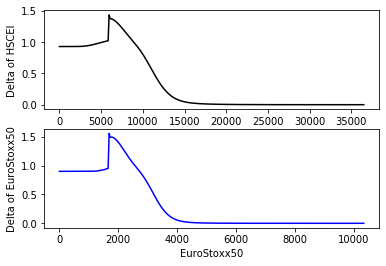

In [18]:
Plotting(X,Y,N = N, DeltaY = DeltaY, DeltaX= DeltaX, max_multiple = 3)

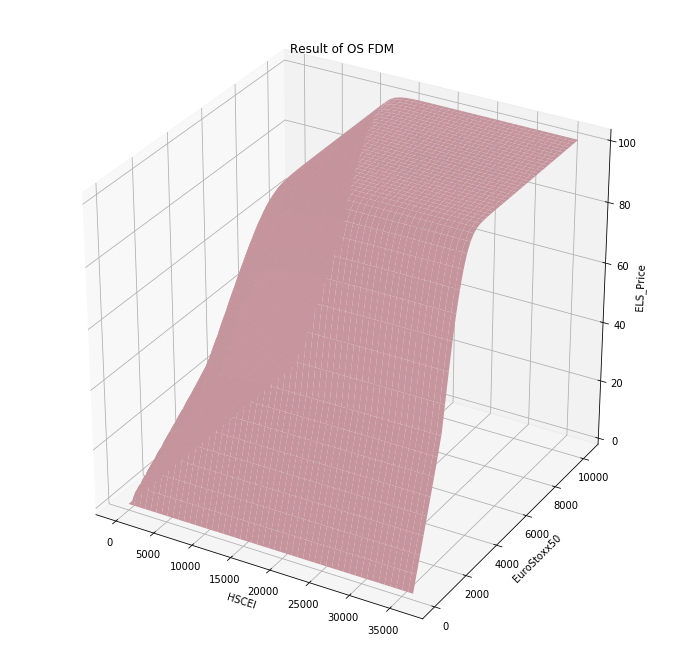

In [19]:
Plot_Price(X,Y,N,Price,max_multiple = 3, color = 'pink')